In [1]:
import csv
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
df=pd.read_csv('creditcard.csv')
print(df.shape)
print(df.columns)


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
print("Time:\n")
print(df['Time'].describe())

Time:

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [4]:
print("Amount:\n")
print(df['Amount'].describe())

Amount:

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [5]:
print("Class:\n")
print(df['Class'].describe())
print(df['Class'].value_counts())

Class:

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64
Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [7]:
## graph construction
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx


In [8]:
fraud_data=df[df['Class']==1]
normal_data=df[df['Class']==0].sample(n=len(fraud_data)*10,random_state=42)
print(fraud_data.shape)
print(normal_data.shape)
selected_df=pd.concat([normal_data,fraud_data])
from sklearn.preprocessing import StandardScaler

# 假設 df 是你的 DataFrame，columns 是要標準化的欄位名稱列表
columns_to_normalize = ['Time', 'Amount']  # 填入要標準化的欄位名稱

# 初始化 StandardScaler 物件
scaler = StandardScaler()

# 對指定列進行標準化
selected_df[columns_to_normalize] = scaler.fit_transform(selected_df[columns_to_normalize])
features=selected_df.drop("Class",axis=1)
cos_sim=cosine_similarity(features)
np.save("cos_sim.npy",cos_sim)
print("Cosine similarity calculation completed and saved.")


(492, 31)
(4920, 31)
Cosine similarity calculation completed and saved.


In [9]:
cos_sim=np.load("cos_sim.npy")
print(cos_sim)
print(cos_sim.shape)

[[ 1.         -0.10474847 -0.17063587 ...  0.00880987  0.19544622
   0.52532881]
 [-0.10474847  1.          0.35448425 ... -0.07256405 -0.13313727
  -0.33534979]
 [-0.17063587  0.35448425  1.         ... -0.11640662 -0.14318716
  -0.26465308]
 ...
 [ 0.00880987 -0.07256405 -0.11640662 ...  1.          0.89628544
   0.18719061]
 [ 0.19544622 -0.13313727 -0.14318716 ...  0.89628544  1.
   0.22006893]
 [ 0.52532881 -0.33534979 -0.26465308 ...  0.18719061  0.22006893
   1.        ]]
(5412, 5412)


In [10]:
# 計算每一列的統計量
max_values = np.max(cos_sim, axis=1)
min_values = np.min(cos_sim, axis=1)
median_values = np.median(cos_sim, axis=1)
mean_values = np.mean(cos_sim, axis=1)
std_values = np.std(cos_sim, axis=1)

# 對這些統計量再次計算統計量
stats_max = np.max(max_values)
stats_min = np.min(min_values)
stats_median = np.median(median_values)
stats_mean = np.mean(mean_values)
stats_std = np.std(std_values)

# 印出結果
print("Statistics of row statistics:")
print("  Max:", stats_max)
print("  Min:", stats_min)
print("  Median:", stats_median)
print("  Mean:", stats_mean)
print("  Std:", stats_std)

Statistics of row statistics:
  Max: 1.000000000000001
  Min: -0.8610622522995957
  Median: -0.020403275449845982
  Mean: 0.007676525874176422
  Std: 0.031593458544467296


In [40]:
G=nx.Graph()
for i in tqdm(range(cos_sim.shape[0]),desc="Add nodes into G..."):
    G.add_node(i)

for i in tqdm(range(cos_sim.shape[0]),desc="Graph Construction..."):
    for j in range(i+1,cos_sim.shape[1]):
        if cos_sim[i,j]>stats_median+stats_std*8:
            G.add_edge(i,j)
print("Number of nodes:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())
density=2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(density)

Graph Construction...: 100%|██████████| 5412/5412 [00:10<00:00, 500.03it/s] 

Number of nodes: 5412
Number of edges: 2495539
0.1704350981951714


In [41]:
from collections import Counter
selected_df.reset_index(drop=True,inplace=True)
# print(selected_df['Class'])

for node in G.nodes():
    # print(node)
    node_class=selected_df.loc[node,'Class']
    G.nodes[node]['Class']=node_class

# 檢查每個節點的 Class 屬性

# 使用 nx.degree() 函數計算每個節點的度
node_degrees = dict(nx.degree(G))

# 使用 Counter 類對節點的度進行統計
# degree_counts = Counter(node_degrees.values())

# # 印出結果
# print("Degree statistics:")
# for degree, count in sorted(degree_counts.items()):
#     print("Degree:", degree, "Count:", count)

# # 找出所有類別為 1 的節點
# class_1_nodes = [node for node, data in G.nodes(data=True) if data.get('Class') == 1]

# # 計算這些節點的度
# class_1_degrees = {node: G.degree(node) for node in class_1_nodes}

# # 印出結果

# for node, degree in class_1_degrees.items():
#     print("Node:", node, "Degree:", degree)
# print(len(class_1_degrees.items()))

In [42]:
edge_consistency={}
fraud_node_set=set()
for edge in tqdm(G.edges(),desc="Check edge consistent..."):
    node1_class=G.nodes[edge[0]]['Class']
    node2_class=G.nodes[edge[1]]['Class']

    if node1_class==node2_class:
        edge_consistency[edge]=1
    else:
        edge_consistency[edge]=0

value_counts=Counter(edge_consistency.values())
print(value_counts)


Check edge consistent...: 100%|██████████| 2495539/2495539 [00:03<00:00, 799297.67it/s]

Counter({1: 2358782, 0: 136757})


C:\Users\aeiou\AppData\Local\Temp\ipykernel_24124\584511664.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset_nodes = random.sample(G.nodes(), k=30)


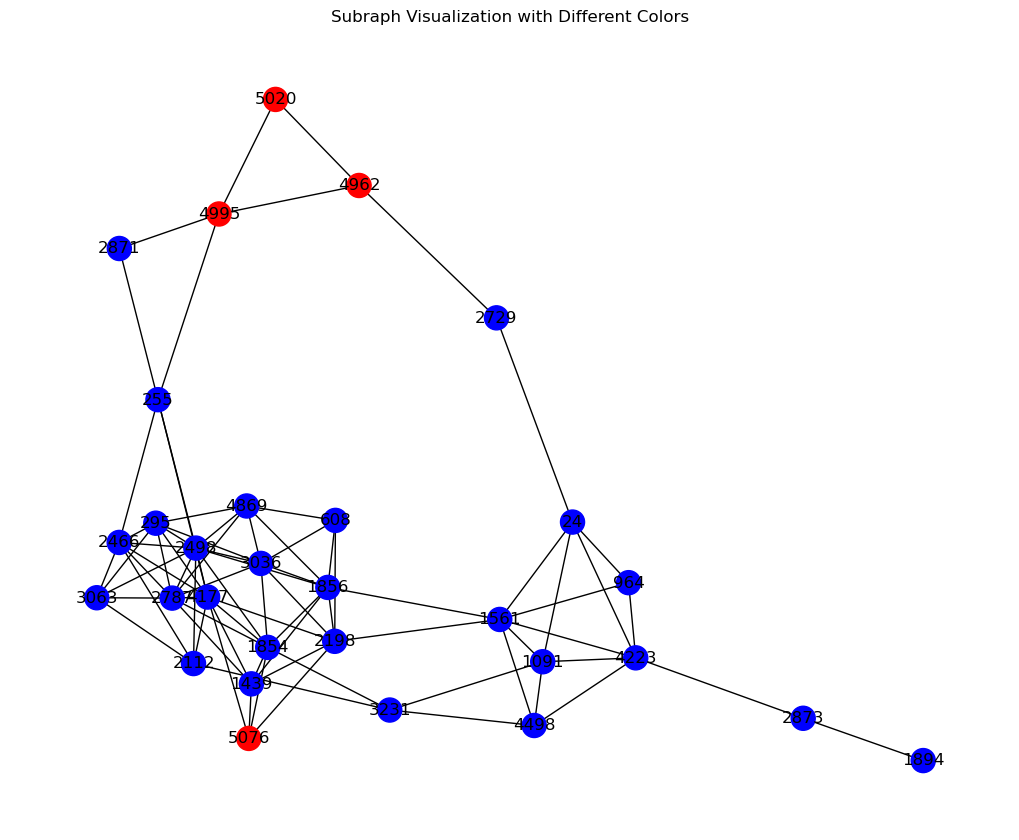

In [43]:
import matplotlib.pyplot as plt
import random
subset_nodes = random.sample(G.nodes(), k=30)
subgraph = G.subgraph(subset_nodes)

# 定義顏色映射
color_map = {0: 'blue', 1: 'red'}

# 根據類別為節點指定顏色
node_colors = [color_map[G.nodes[node]['Class']] for node in subgraph.nodes()]

# 繪製子圖
plt.figure(figsize=(10, 8))
nx.draw(subgraph, with_labels=True, node_color=node_colors)
plt.title("Subraph Visualization with Different Colors")
plt.show()

In [20]:
## tree-based unsupervised clustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 假設 X 是特徵矩陣，每一行代表一個節點的特徵
X=features.values
y=selected_df['Class']
# 假設 G 是你的圖形，nodes 是節點的列表

# 使用 Random Forest 對節點進行無監督分群
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X,y)

# 獲取每個節點的分群結果
labels = rf.predict(X)

# 根據分群結果計算節點之間的距離
distances = euclidean_distances(X)
print(len(labels))
print(len(distances))
print(labels)

5412
5412
[0 0 0 ... 1 1 1]
